Importing supporting libraries

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

Loading Excel Dataset at the colab platform

In [ ]:
df=pd.read_excel("/content/drive/MyDrive/Design Credits/Hrishi(B20CH018)/Final Dataset/polymer_dataset.xlsx")

# Preprocessing the dataset


In [ ]:
df.head()

,Material Name,Density(gm/cm3),Glass Transition Temperature(deg C),youngs modulus(GPa),tensile strengh at Break(MPa),Reference link,Unnamed: 6,Unnamed: 7
0,Coastal Enterprises Plus™ PBLT-4 High Density ...,0.0641,103,0.00392,62.0 - 76.0,https://www.matweb.com/search/DataSheet.aspx?M...,NaN,#NAME?
1,Coastal Enterprises Plus™ PBLT-6 High Density ...,0.0961,110,0.00538,62.0 - 76.0,https://www.matweb.com/search/DataSheet.aspx?M...,NaN,#NAME?
2,Coastal Enterprises Plus™ PBLT-8 High Density ...,0.128,109,0.0103,76,https://www.matweb.com/search/DataSheet.aspx?M...,NaN,#NAME?
3,Coastal Enterprises Plus™ PBLT-10 High Density...,0.16,114,0.0129,221 - 241,https://www.matweb.com/search/DataSheet.aspx?M...,NaN,#NAME?
4,Coastal Enterprises Plus™ PBLT-12 High Density...,0.192,98.9,0.0152,290 - 317,https://www.matweb.com/search/DataSheet.aspx?M...,NaN,#NAME?


In [ ]:
df=df.drop(columns=['Unnamed: 7','Unnamed: 6'])

In [ ]:
df.head()

,Material Name,Density(gm/cm3),Glass Transition Temperature(deg C),youngs modulus(GPa),tensile strengh at Break(MPa),Reference link
0,Coastal Enterprises Plus™ PBLT-4 High Density ...,0.0641,103,0.00392,62.0 - 76.0,https://www.matweb.com/search/DataSheet.aspx?M...
1,Coastal Enterprises Plus™ PBLT-6 High Density ...,0.0961,110,0.00538,62.0 - 76.0,https://www.matweb.com/search/DataSheet.aspx?M...
2,Coastal Enterprises Plus™ PBLT-8 High Density ...,0.128,109,0.0103,76,https://www.matweb.com/search/DataSheet.aspx?M...
3,Coastal Enterprises Plus™ PBLT-10 High Density...,0.16,114,0.0129,221 - 241,https://www.matweb.com/search/DataSheet.aspx?M...
4,Coastal Enterprises Plus™ PBLT-12 High Density...,0.192,98.9,0.0152,290 - 317,https://www.matweb.com/search/DataSheet.aspx?M...


for ML model, we need only parameters amd Target values, therefore we drop material name and reference link

In [ ]:
df=df.drop(columns=['Material Name','Reference link'])

In [ ]:
df.head()

,Density(gm/cm3),Glass Transition Temperature(deg C),youngs modulus(GPa),tensile strengh at Break(MPa)
0,0.0641,103,0.00392,62.0 - 76.0
1,0.0961,110,0.00538,62.0 - 76.0
2,0.128,109,0.0103,76
3,0.16,114,0.0129,221 - 241
4,0.192,98.9,0.0152,290 - 317


In [ ]:
df.describe()

,Density(gm/cm3),Glass Transition Temperature(deg C),youngs modulus(GPa),tensile strengh at Break(MPa)
count,991.0,991,991.0,714.0
unique,286.0,323,599.0,467.0
top,1.2,55,2.4,2.4
freq,115.0,62,83.0,50.0


In [ ]:
df.isnull()

,Density(gm/cm3),Glass Transition Temperature(deg C),youngs modulus(GPa),tensile strengh at Break(MPa)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
986,False,False,False,False
987,False,False,False,False
988,False,False,False,True
989,False,False,False,False


In [ ]:
df.isnull().values.sum()

277

In [ ]:
df=df.dropna(axis=0,how='any')

In [ ]:
df.shape

(714, 4)

In [ ]:
# X=df.iloc[:,1:]
# X

In [ ]:
Y=df['Density(gm/cm3)']
Density=[]
G=[]
Yg=[]
T=[]

In [ ]:
for i in Y:
    if(type(i)!=float):
        p=i.split('-')
        Density.append((float(p[0])+float(p[1]))/2)
    else:
        Density.append(i)

In [ ]:
for j in df['Glass Transition Temperature(deg C)']:
    if((type(j)==str)):
        p=j.split(' - ')
        G.append((float(p[0])+float(p[1]))/2)
    else:
        G.append(j)
print(G)
len(G)

[103, 110, 109, 114, 98.9, 140, 126, 140, 97.8, 140, 98.3, 140, 100, 140, 97.8, 140, 103, 140, 102, 89, 51.1, 83, 140, 103, 99, 45.0, 104, 57.5, 89, 89, 95, 95, 90, 18, 112, 103, 103, 103, 103, 140, 114, 104, 104, 104, 104, 58, 49, 140, 103, 42.5, 49, 220, 129.5, 50.0, 50.0, 50.0, 94, 58, 37, 45.0, 142, 144, 145, 145, 143, 144, 145, 145, 145, 144, 110, 141.5, 50.0, 50.0, 47.5, 47.5, 47.5, 47.5, 145, 148, 144, 144, 143, 142, 148, 146, 144, 145, 147, 145, 143, 143, 147, 148, 145, 144, 144, 144, 148, 145, 145, 144, 149, 145, 146, 146, 147, 143, 145, 146, 144, 147, 146, 146, 146, 148, 142, 148, 145.5, 144, 145, 144, 145, 145, 145, 149, 145, 146, 150, 145, 144, 141, 146, 144, 145, 145, 145, 147, 145, 152, 148, 144, 143, 146, 144, 143, 145, 145, 144, 145, 148, 146, 149, 150, 142, 145, 144, 144, 140, 104, 100.0, 171.5, 35.0, 200, 200, 200, 200, 120.0, 100, 127.5, 189.5, 189.5, 142.5, 142.5, 142.5, 142.5, 142.5, 142.5, 0, 48, 70, 121.5, 145.5, 145.5, 145.5, 145.5, 145.5, 0, 50.0, 50.0, 50.0, 3

714

In [ ]:
for j in df['youngs modulus(GPa)']:
    if((type(j)==str)):
        p=j.split(' - ')
        Yg.append((float(p[0])+float(p[1]))/2)
    else:
        Yg.append(j)
print(Yg)
len(Yg)

[0.00392, 0.00538, 0.0103, 0.0129, 0.0152, 0.221, 0.221, 0.397, 0.393, 0.414, 0.414, 0.454, 0.45, 0.455, 0.454, 0.677, 0.677, 1.08, 1.08, 1.6, 0.0026, 0.488, 1.64, 1.64, 1.5950000000000002, 0.5, 1.7850000000000001, 2.38, 3.25, 3.25, 3.28, 3.28, 3.25, 1.4, 1.615, 3.55, 3.55, 3.5, 3.5, 2.53, 1.245, 3.6, 3.6, 3.6, 3.6, 3.17, 2.27, 2.11, 2.11, 2.7649999999999997, 2.0999999999999996, 2.85, 1.96, 2.85, 2.85, 2.85, 2.37, 5.175, 2.41, 2.43, 1.945, 2.35, 2.35, 2.35, 2.2, 2.35, 2.35, 2.35, 2.4, 2.4, 63.0, 127.1, 4.4, 4.4, 3.25, 4.1, 4.15, 4.15, 2.21, 2.35, 2.4, 2.4, 2.4, 2.4, 2.35, 2.4, 2.4, 2.4, 2.35, 2.4, 2.4, 2.4, 2.35, 2.35, 2.4, 2.4, 2.4, 2.4, 2.35, 2.4, 2.4, 2.4, 2.35, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.35, 2.4, 2.35, 2.4, 2.4, 2.4, 2.25, 2.35, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.35, 2.4, 2.4, 2.35, 2.4, 2.45, 2.45, 2.4, 2.4, 2.4, 2.4, 2.4, 2.35, 2.4, 2.3, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.35, 2.35, 2.4, 2.4, 2.4, 2.4, 2.48, 2.48, 70.05, 117.0, 3.75, 89.75, 1

714

In [ ]:
for j in df['tensile strengh at Break(MPa)']:
    if((type(j)==str)):
        p=j.split(' - ')
        T.append((float(p[0])+float(p[1]))/2)
    else:
        T.append(j)
print(T)
len(T)

[69.0, 69.0, 76, 231.0, 303.5, 4.6, 283.0, 82.85, 48.0, 2.9, 55.0, 3.1, 30, 69.25, 28.0, 3.52, 25.5, 39.9, 3.5, 3.205, 9.5, 2.6, 34.7, 3.62, 1.5, 10.5, 6.8, 0.221, 2.6, 2.6, 6, 7.2, 8.5, 2.12, 10.1, 9.25, 14.25, 14, 0.5, 5.52, 2.7, 0.67, 14.9, 23, 21, 11.6, 2.7, 51.349999999999994, 77, 11.1, 7.5, 2.585, 0.414, 5.25, 1.4000000000000001, 3.75, 2.6, 7.1, 7.5, 9.6, 1.5, 2.35, 2.4, 2.4, 2.4, 2.4, 2.3, 2.4, 0.488, 1.4849999999999999, 2.73, 3.52, 9.75, 9.5, 7.35, 8.75, 10.25, 11.6, 3.96, 2.4, 2.4, 2.35, 2.4, 2.4, 2.4, 2.35, 2.4, 2.35, 2.45, 2.4, 2.45, 2.45, 2.4, 2.4, 2.4, 2.4, 2.35, 2.35, 2.35, 2.4, 2.4, 2.4, 2.35, 2.35, 2.35, 2.4, 2.3, 9.1, 9, 8, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.35, 2.35, 2.3, 2.4, 2.4, 2.4, 2.4, 2.4, 4, 2.4, 2.3, 2.4, 2.4, 2.4, 3.05, 1.615, 1.245, 4.5, 2.27, 5.96, 2.31, 2.185, 2.37, 3.71, 1.945, 1.5950000000000002, 3.1500000000000004, 3, 2.7, 2.7, 7.3, 2.625, 131.0, 77, 3.25, 1.96, 3.25, 12, 15, 17, 3.3, 2.21, 11.2, 11, 3.7, 

714

In [ ]:
# Y=pd.DataFrame(Density,columns=['Density'])
# Y

In [ ]:
X=pd.DataFrame(G,columns=['Glass_Transition_Temp'])
X['young_mod']=pd.Series(Yg,index=X.index)
X['tensile_strengh_at_Break']=pd.Series(T,index=X.index)
X['Density']=pd.Series(Density,index=X.index)
X = X.drop(X[X.young_mod > 120].index)
# X = X.drop(X[X.Density >2.3 ].index)
# X = X.drop(X[X.Density <0.5].index)
X = X.drop(X[X.tensile_strengh_at_Break > 70].index)
X

,Glass_Transition_Temp,young_mod,tensile_strengh_at_Break,Density
0,103.0,0.00392,69.000000,0.0641
1,110.0,0.00538,69.000000,0.0961
5,140.0,0.22100,4.600000,0.2400
8,97.8,0.39300,48.000000,0.2880
9,140.0,0.41400,2.900000,0.3200
...,...,...,...,...
709,84.0,15.80000,3.730000,1.7750
710,162.5,13.10000,19.300000,1.9700
711,115.0,8.55000,1.035017,1.7450
712,160.0,13.80000,2.810000,1.8250


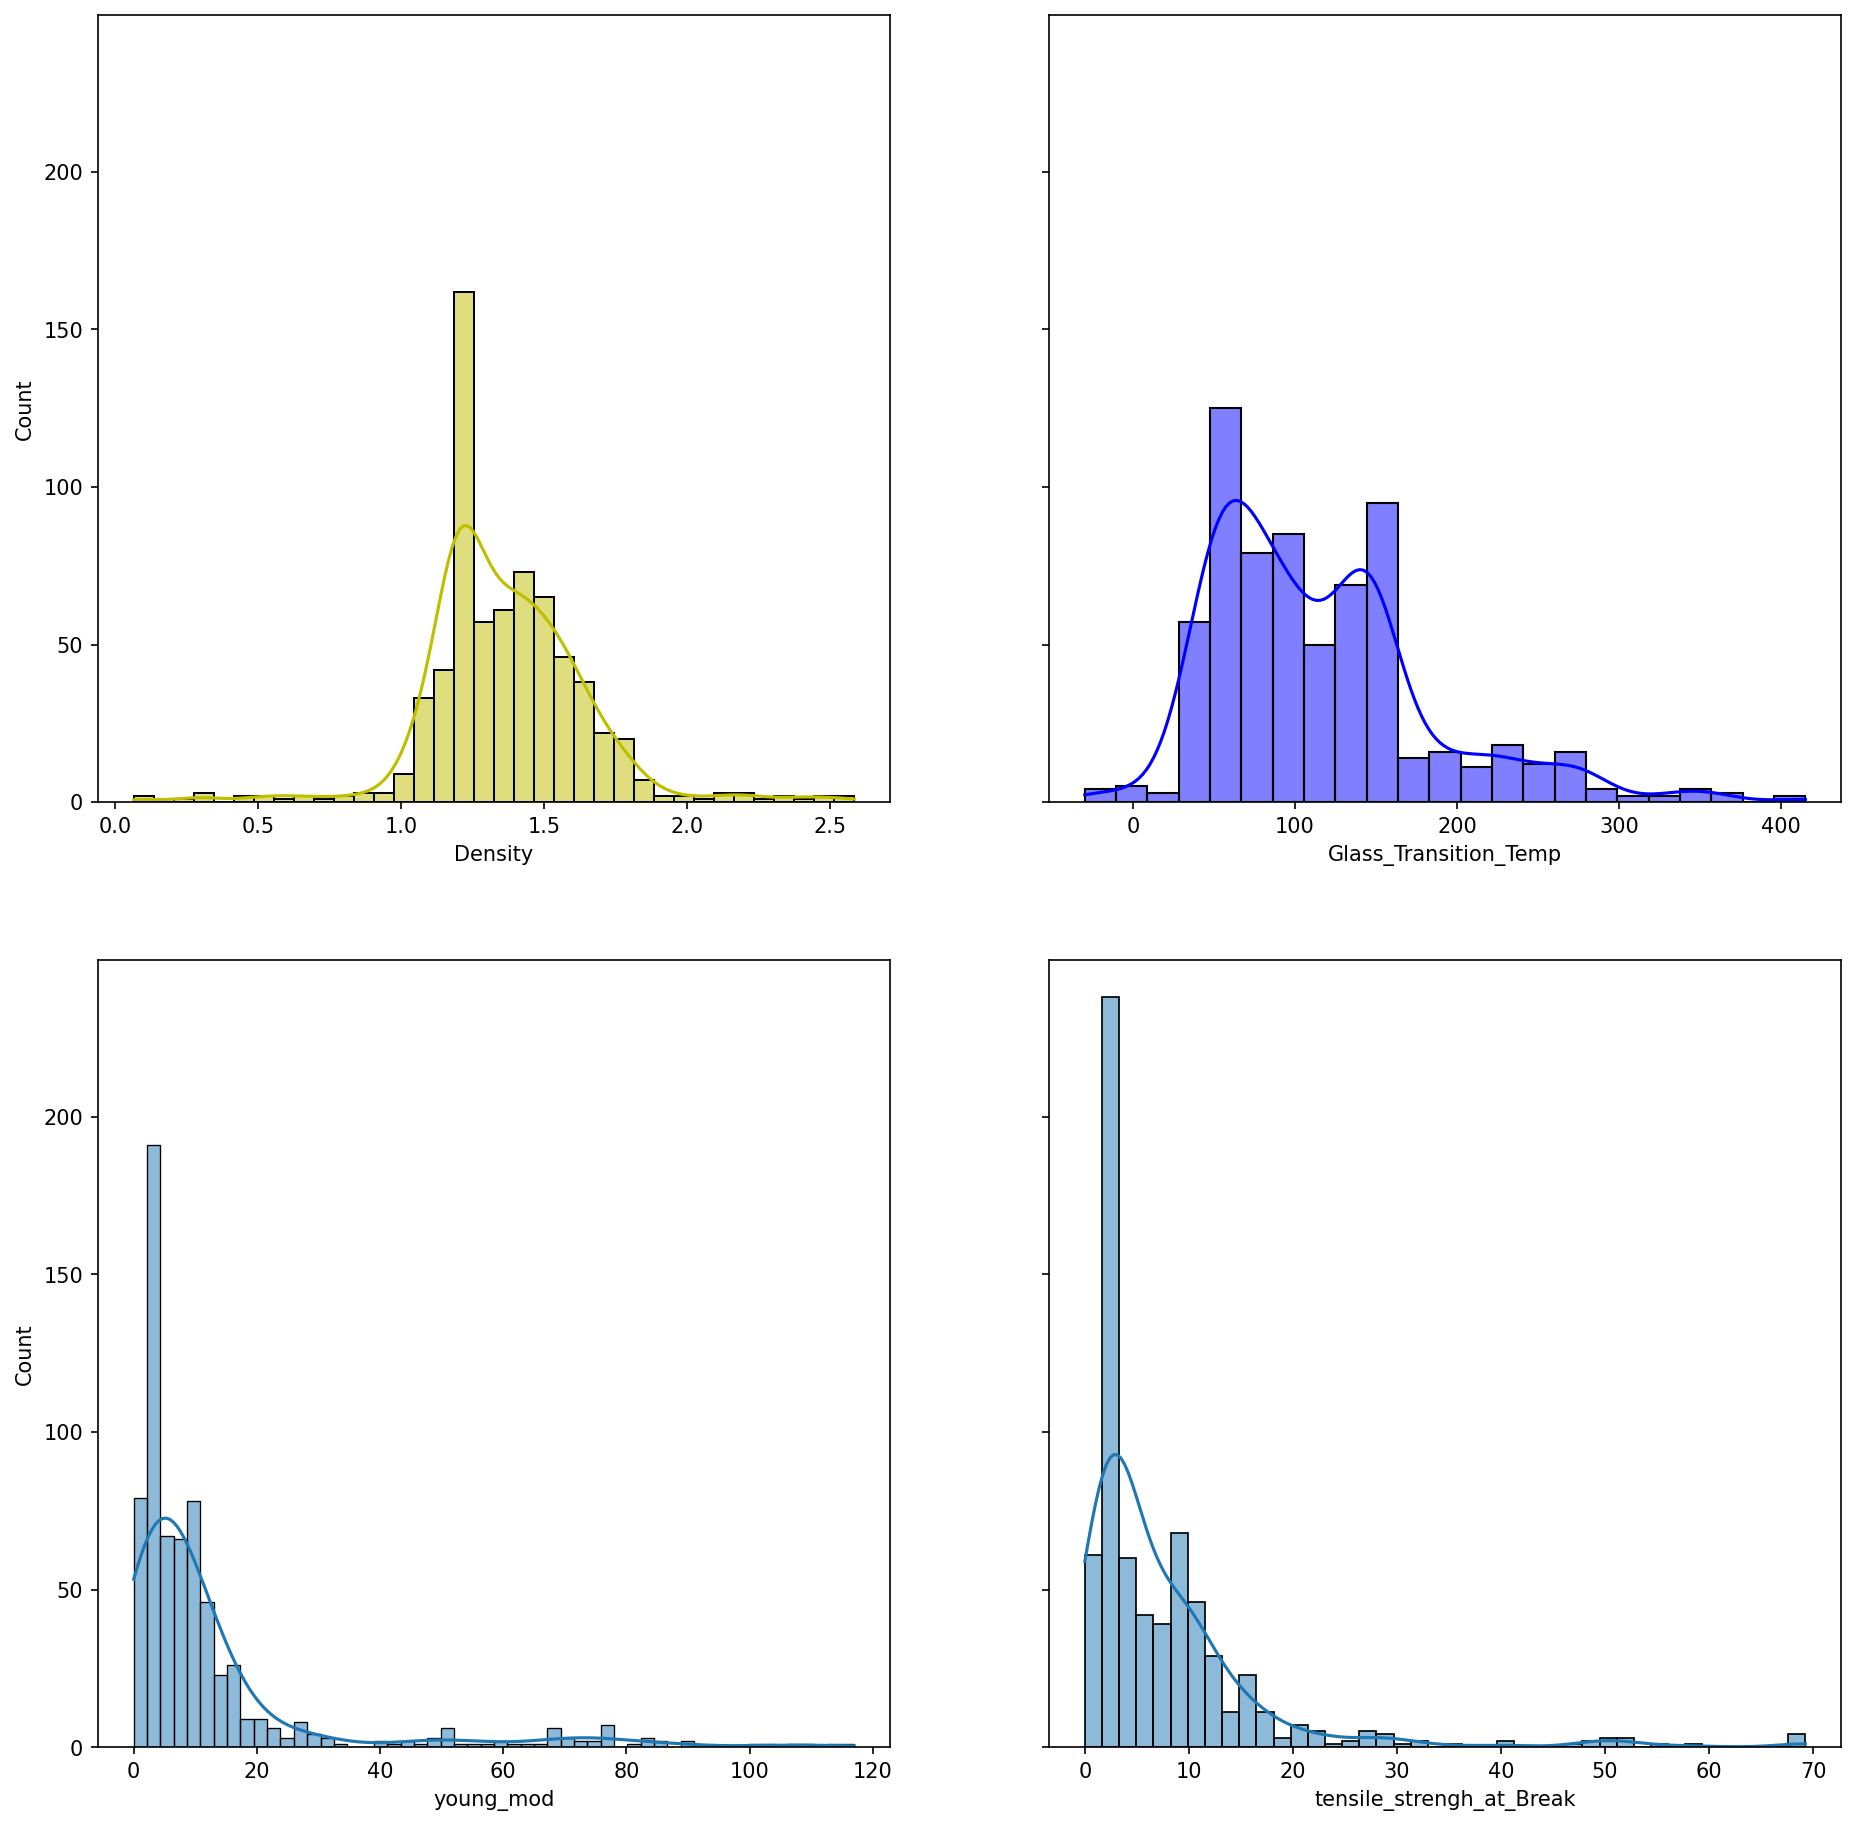

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15,15), sharey=True,dpi=150)
sns.histplot(X, ax=axes[0][0], x=X['Density'], kde=True, color='y')
sns.histplot(X, ax=axes[0][1], x=X['Glass_Transition_Temp'], kde=True, color='b')
sns.histplot(X, ax=axes[1][0], x=X['young_mod'], kde=True)
sns.histplot(X, ax=axes[1][1], x=X['tensile_strengh_at_Break'], kde=True)
plt.savefig("/content/drive/MyDrive/Design Credits/Hrishi(B20CH018)/Histogram/histograms_of_Properties.png",dpi=300)

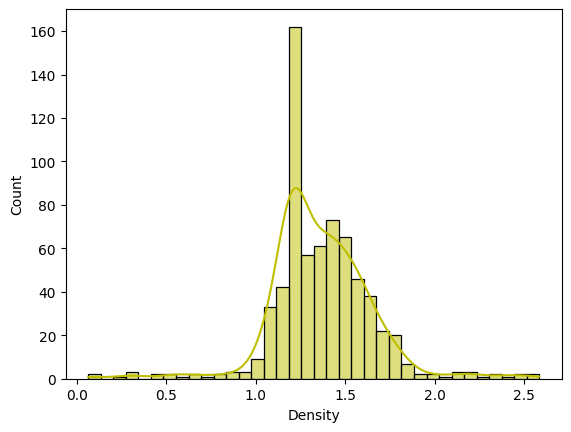

In [ ]:
sns.histplot(X,x=X['Density'],kde=True,color='y')
plt.savefig("/content/drive/MyDrive/Design Credits/Hrishi(B20CH018)/Histogram/histograms_of_Density.png",dpi=300)

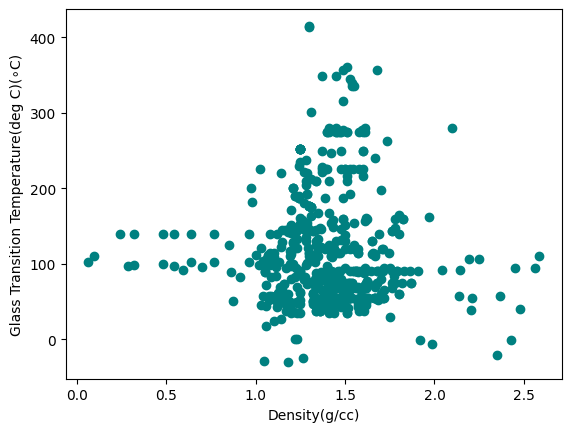

In [ ]:
plt.scatter(X['Density'],X['Glass_Transition_Temp'],color='Teal')
plt.xlabel('Density(g/cc)')
plt.ylabel('Glass Transition Temperature(deg C)(∘C)')
plt.savefig("/content/drive/MyDrive/Design Credits/Hrishi(B20CH018)/Plot/Tg-Density.png",dpi=150)
# plt.scatter(Y['Density'],X['young_mod'],color='y')
# plt.xlim([0.5,2.5])
# plt.ylim([0,450]

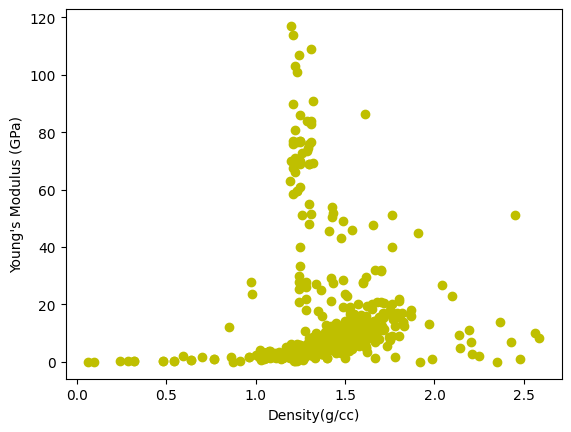

In [ ]:
plt.scatter(X['Density'],X['young_mod'],color='y')
plt.xlabel('Density(g/cc)')
plt.ylabel("Young's Modulus (GPa)")
plt.savefig("/content/drive/MyDrive/Design Credits/Hrishi(B20CH018)/Plot/Yng_Modulus-Density.png",dpi=150)
# plt.xlim([0.5,2.5])
# plt.ylim([0,20])

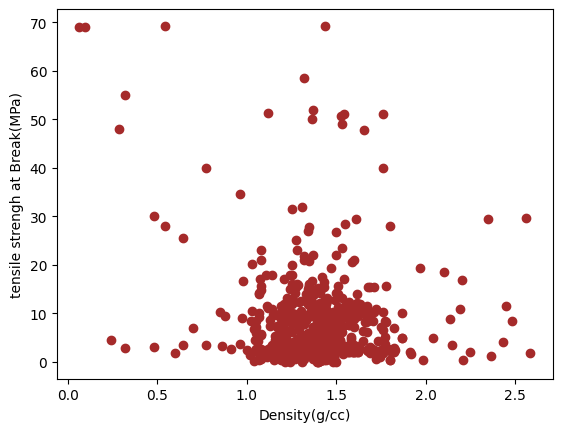

In [ ]:
plt.scatter(X['Density'],X['tensile_strengh_at_Break'],color='Brown')
plt.xlabel('Density(g/cc)')
plt.ylabel("tensile strengh at Break(MPa)")
plt.savefig("/content/drive/MyDrive/Design Credits/Hrishi(B20CH018)/Plot/tensile strengh at Break(MPa)-Density.png",dpi=150)

In [ ]:
Y=X['Density']

In [ ]:
X=X.iloc[:,:-1]
X

,Glass_Transition_Temp,young_mod,tensile_strengh_at_Break
0,103.0,0.00392,69.000000
1,110.0,0.00538,69.000000
5,140.0,0.22100,4.600000
8,97.8,0.39300,48.000000
9,140.0,0.41400,2.900000
...,...,...,...
709,84.0,15.80000,3.730000
710,162.5,13.10000,19.300000
711,115.0,8.55000,1.035017
712,160.0,13.80000,2.810000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape)
X_train

(540, 3)


,Glass_Transition_Temp,young_mod,tensile_strengh_at_Break
344,45.0,9.750,8.50
108,145.0,2.400,9.00
280,210.0,4.410,4.14
208,252.0,4.600,3.60
165,200.0,75.750,17.00
...,...,...,...
14,97.8,0.454,28.00
390,70.0,8.250,2.25
206,152.5,77.000,10.00
667,45.0,9.250,11.80


In [ ]:
X_test

,Glass_Transition_Temp,young_mod,tensile_strengh_at_Break
600,61.0,2.555,2.455000
36,103.0,3.550,14.250000
382,70.0,4.100,13.100000
202,63.0,3.050,2.555000
435,125.0,16.600,2.450000
...,...,...,...
405,225.0,7.300,21.950000
84,148.0,2.350,2.400000
171,189.5,69.250,3.100000
711,115.0,8.550,1.035017


In [ ]:
y_test
DF_test = pd.DataFrame(y_test)
DF_test

,Density
600,1.125
36,1.070
382,1.450
202,1.250
435,1.550
...,...
405,1.500
84,1.200
171,1.220
711,1.745


In [ ]:
model = XGBRegressor()
model.fit(X_train, y_train)

print(f'Score: {round(model.score(X_test, y_test)*100)} %')

Score: 57 %


In [ ]:
y_pred=model.predict(X_test)
DF = pd.DataFrame(y_pred)
DF.to_csv("pred.csv")

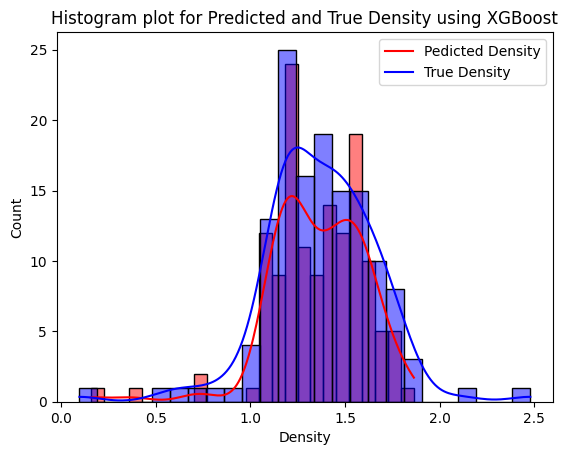

In [ ]:
sns.histplot(x=y_pred,kde=True,bins=25,color='red',legend=True).set(title='Histogram plot for Predicted and True Density using XGBoost')
sns.histplot(x=y_test,kde=True,bins=25,color='Blue',legend=True)
plt.legend(labels=["Pedicted Density","True Density"])
plt.savefig("/content/drive/MyDrive/Design Credits/Hrishi(B20CH018)/Plot/XGB_Predicted_vs_True.png",dpi=150)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [ ]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

print(f'Score: {round(forest.score(X_test, y_test)*100)} %')

Score: 54 %


In [ ]:
y_pred=forest.predict(X_test)
y_pred

array([1.1465    , 1.0881    , 1.31525   , 1.141245  , 1.620895  ,
       1.4326    , 1.6402995 , 1.038715  , 1.344     , 1.2542    ,
       1.0739    , 1.37665   , 1.78395   , 1.510195  , 1.5756    ,
       1.126565  , 1.61738619, 1.6692    , 1.6641    , 1.1063    ,
       1.2       , 1.43025   , 1.5438    , 1.13225   , 1.135075  ,
       1.2732225 , 1.37185   , 0.482885  , 1.51335   , 1.2       ,
       1.3334    , 1.20625   , 1.2678    , 1.2167    , 1.2       ,
       1.70935   , 1.59905   , 1.55292667, 1.6269    , 1.53377833,
       1.5160325 , 1.13272   , 1.12109   , 1.2418    , 1.87305   ,
       1.41201548, 1.48035   , 1.48875   , 1.2       , 1.801565  ,
       1.5257    , 1.20002   , 1.3368    , 1.56515   , 1.44365   ,
       1.4343    , 1.44585   , 1.20285   , 1.4366    , 1.2       ,
       1.19335   , 1.537095  , 1.76175   , 1.48563333, 1.2       ,
       1.23485   , 1.12662   , 1.6167    , 1.2604    , 1.373975  ,
       1.5738    , 1.2       , 1.339622  , 1.51495   , 1.61225

In [ ]:
DF_test['Predicted_Density'] = y_pred
DF_test.to_csv(r"/content/drive/MyDrive/Design Credits/Hrishi(B20CH018)/Final Dataset/polymer_pred_using_random_forests.csv",index=False)

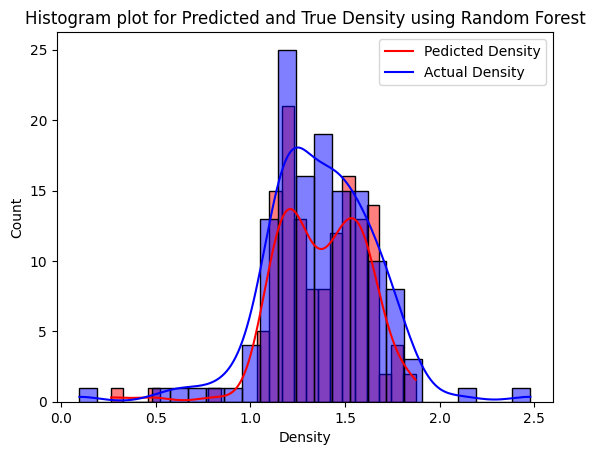

In [ ]:
sns.histplot(x=y_pred,kde=True,bins=25,color='r',legend=True).set(title='Histogram plot for Predicted and True Density using Random Forest')
sns.histplot(x=y_test,kde=True,bins=25,color='Blue',legend=True)
plt.legend(labels=["Pedicted Density","Actual Density"])
plt.savefig("/content/drive/MyDrive/Design Credits/Hrishi(B20CH018)/Plot/Random_forest_Predicted_vs_True.png",dpi=150)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.019627470563470806

In [ ]:
print(f'Score: {round(reg.score(X_test, y_test)*100)} %')

Score: 6 %


In [ ]:
y_pred3=reg.predict(X_test)

DF3= pd.DataFrame(y_pred3)
# DF3.rename(columns = {0:'Density(gm/cm^3)'}, inplace = True)
DF3

,0
0,1.375678
1,1.336906
2,1.350668
3,1.375634
4,1.378814
...,...
131,1.287438
132,1.348602
133,1.443191
134,1.372072


In [ ]:
DF3['true Density']= pd.DataFrame(y_test)
DF3

,0,true Density
0,1.375678,NaN
1,1.336906,0.0961
2,1.350668,NaN
3,1.375634,NaN
4,1.378814,NaN
...,...,...
131,1.287438,NaN
132,1.348602,NaN
133,1.443191,NaN
134,1.372072,1.2000


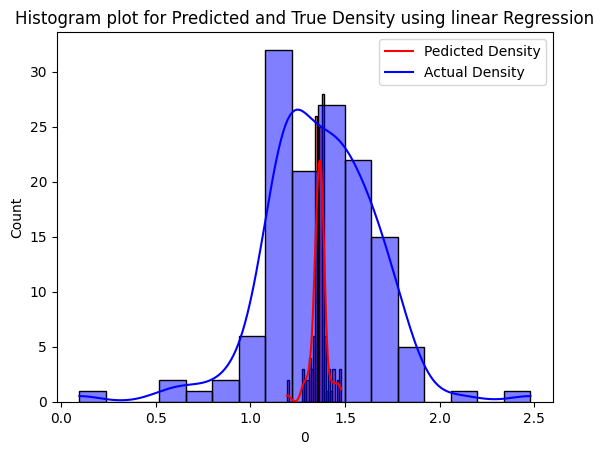

In [ ]:
sns.histplot(x=DF3[0],kde=True,bins='auto',color='r',legend=True).set(title='Histogram plot for Predicted and True Density using linear Regression')
sns.histplot(x=y_test,kde=True,bins='auto',color='Blue',legend=True)
# sns.histplot(x=y_test['Density'],kde=True,bins='auto',color='Blue',legend=True)
plt.legend(labels=["Pedicted Density","Actual Density"])
plt.savefig("/content/drive/MyDrive/Design Credits/Hrishi(B20CH018)/Plot/Regressor_Predicted_vs_True.png",dpi=150)

In [ ]:
from sklearn import svm
regr = svm.SVR()
regr.fit(X_train, y_train)
print(f'Score: {round(regr.score(X_test, y_test)*100)} %')

Score: 37 %


In [ ]:
y_pred4=regr.predict(X_test)

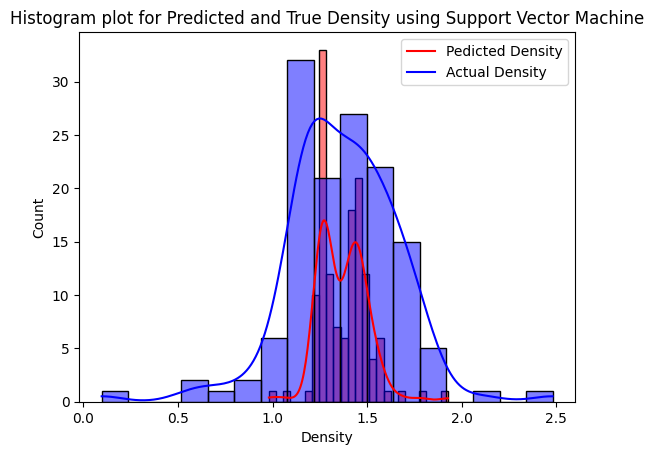

In [ ]:
sns.histplot(x=y_pred4,kde=True,bins=25,color='r',legend=True).set(title='Histogram plot for Predicted and True Density using Support Vector Machine')
# sns.histplot(x=y_test['Density'],kde=True,bins=25,color='Blue',legend=True)
sns.histplot(x=y_test,kde=True,bins='auto',color='Blue',legend=True)
plt.legend(labels=["Pedicted Density","Actual Density"])
plt.savefig("/content/drive/MyDrive/Design Credits/Hrishi(B20CH018)/Plot/SVM_Predicted_vs_True.png",dpi=150)